In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

In [24]:
!ls
#load data
data = np.loadtxt('housing.txt')
print(data.shape)

Boston-adaptive learning rate.ipynb housing.names.txt
boston.ipynb                        housing.txt
(506, 14)


In [25]:
#separate data into inputs and outputs
x = data[:,:13]
y = data[:,13]

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [26]:
#normalize inputs
#print(x.shape)
for i in range(x.shape[1]):
    #print(i)
    t = x[:,i]
    x[:,i] = (t - np.min(t))/(np.max(t) - np.min(t))


In [27]:
#add bias term
b = np.ones((x.shape[0],1))
x = np.hstack((x,b))
print(x.shape)

(506, 14)


In [28]:
print(x[:5,:])

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.08015267e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02 1.00000000e+00]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01 1.00000000e+00]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 9.89737254e-01
  6.34657837e-02 1.00000000e+00]
 [2.92795719e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.58555279e-01 4.41812564e-01 4.48544590e-01
  8.69565217e-02 6.67938931e-02 6.48936170e-01 9.94276060e-01
  3.33885210e-02 1.00000000e+00]
 [7.05070075e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.87104809e-01 5.28321318e-01 4.48544590e-01


In [29]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)
ytr = ytr.reshape(ytr.shape[0],1)
yte = yte.reshape(yte.shape[0],1)

In [30]:
#uniform random initialization of weights
w = np.random.uniform(0.0,1.0,x.shape[1]).reshape(x.shape[1],1)
print(w)
print(w.shape)

[[0.06473387]
 [0.63964995]
 [0.49781998]
 [0.21028052]
 [0.60066698]
 [0.39191144]
 [0.80310786]
 [0.11770165]
 [0.80772955]
 [0.77896729]
 [0.82820496]
 [0.88116211]
 [0.61275185]
 [0.31139526]]
(14, 1)


In [31]:
#define hyper-parameters
epochs = 2000
a = 0.2

In [32]:
#linear regression with constant learning rate 
train_acc = []
test_acc = []

m = xtr.shape[0]
n = xtr.shape[1]

mte = xte.shape[0]

for i in range(epochs):
    ybar = np.dot(xtr,w)
    
    #mse error in training set
    err = np.sum((ybar - ytr)**2)/(2*m)
    train_acc.append(err)
    
    #mse error in test set
    tmp = np.dot(xte,w)
    tmp_err = np.sum((tmp - yte)**2)/(2*mte)
    test_acc.append(tmp_err)
    
    #calculate gradient
    del_y = ybar - ytr
    
    for j in range(n):
        xcurr = xtr[:,j]
        xcurr = xcurr.reshape(xcurr.shape[0],1)
        del_w = (sum(del_y[:]*xcurr[:]))/(m)
        #reduction factor to reduce learning rate 'a'
        rf = 1 + i/2000
        w[j] = w[j] - (a/rf)*del_w

    if(i%100 == 0):
        print("Train Error", err)
        print("Test Error", tmp_err)

Train Error 214.75094243120716
Test Error 245.89326111954304
Train Error 16.53182223448056
Test Error 20.226809183175934
Train Error 13.468533554368225
Test Error 15.757980367717982
Train Error 12.33656063640351
Test Error 14.032506202749586
Train Error 11.808370690028639
Test Error 13.232867645927803
Train Error 11.517211351523153
Test Error 12.811223708949385
Train Error 11.334481223069487
Test Error 12.564100044503606
Train Error 11.208036882596595
Test Error 12.406046653842116
Train Error 11.114257468223178
Test Error 12.297711239490644
Train Error 11.04131875254291
Test Error 12.219428642762345
Train Error 10.98271693931709
Test Error 12.160591084662764
Train Error 10.934552474349468
Test Error 12.115055575136408
Train Error 10.8943066698796
Test Error 12.07903077252682
Train Error 10.860251285333518
Test Error 12.050044650916982
Train Error 10.831143307096488
Test Error 12.026409900250442
Train Error 10.806056137616242
Test Error 12.006931027096094
Train Error 10.784280055964407


<IPython.core.display.Javascript object>


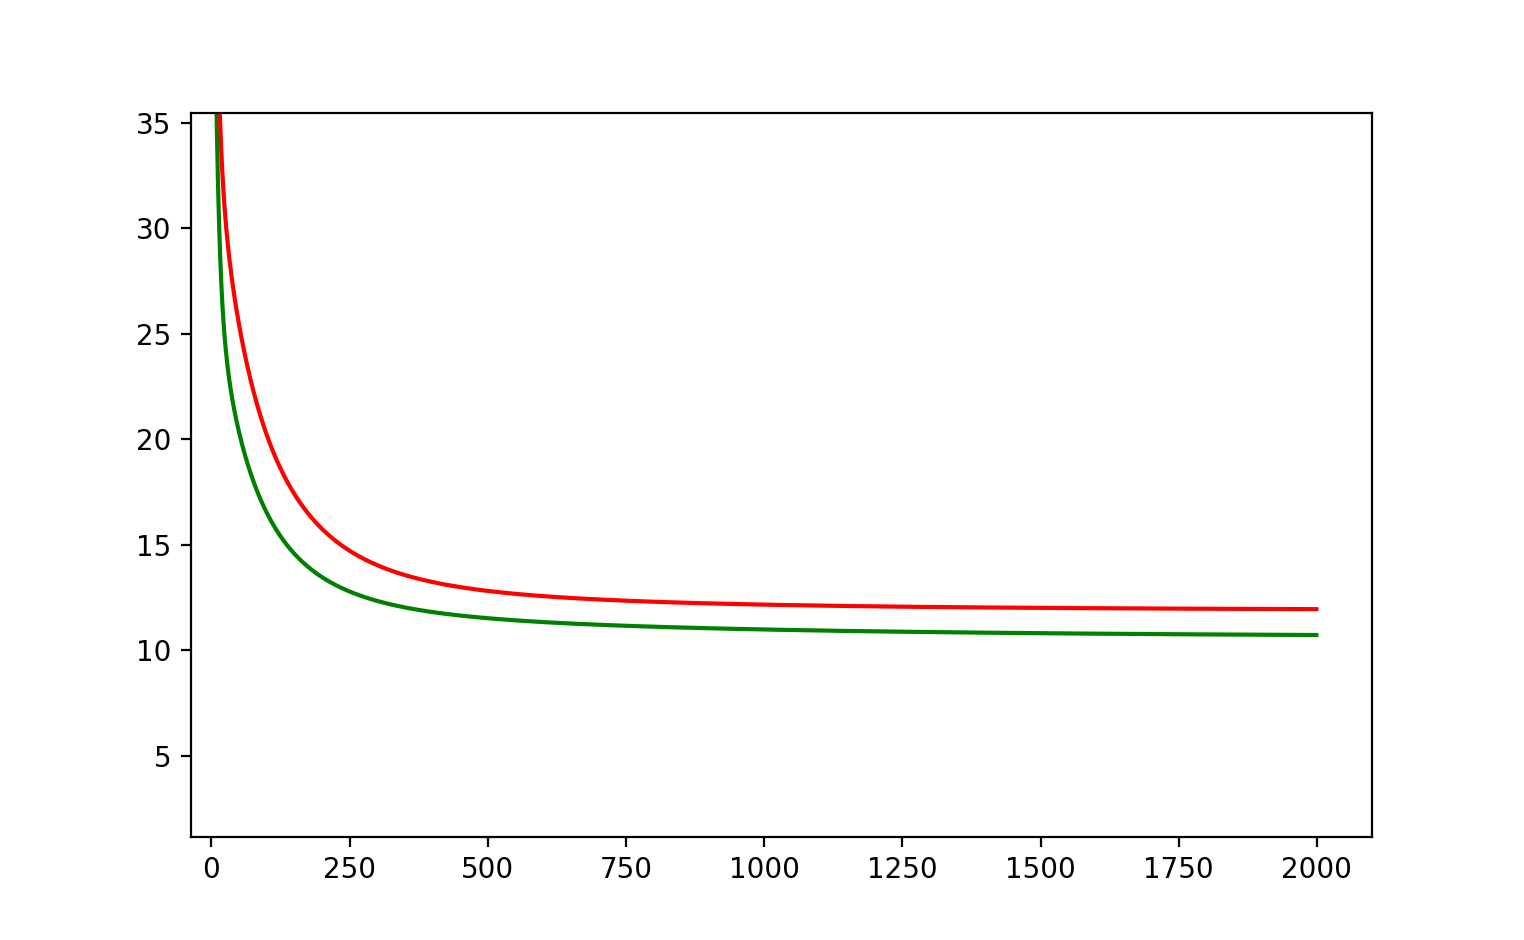

In [33]:
x_axis = np.arange(len(test_acc))
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(x_axis,train_acc,'g')
plt.plot(x_axis,test_acc,'r')
plt.show()

In [34]:
#benchmarking against scikit-learn algorithm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

model = LinearRegression()
model.fit(xtr,ytr)
yhat = model.predict(xte)
err = mse(yte, yhat)
print(err)

23.849769979449686
